In [1]:
!pip install geopy

In [2]:
!pip install shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.3 MB/s eta 0:00:00


In [83]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import json
#from geopy.distance import geodesic
#import folium
import os

In [87]:
df = pd.read_csv('BaseDeDonnées/Accidents_france/Véhicules/vehicules-2018.csv',sep=',')
df['Num_Acc'] = df['Num_Acc'].astype(str)

In [89]:
df = pd.DataFrame([1,2,3],columns = ['Test'])

df['Test']=df['Test'].astype(str)

In [15]:
def fct_accidents(file_caracteristique, file_vehicules):
        df_accidents = pd.read_csv(file_caracteristique, sep=';')
        df_vehicules = pd.read_csv(file_vehicules, sep=';')
        # Condition pour avoir les clefs primaires du même nom
        if 'Accident_Id' in df_accidents.columns:
            df_accidents = df_accidents.rename(columns={'Accident_Id': 'Num_Acc'})
        # Condition pour avoir des fichiers de même année
        df_vehicules['Num_Acc'] = df_vehicules['Num_Acc'].astype(str)
        if df_accidents['an'][0]+int(df_vehicules.iloc[0]['Num_Acc'][:4]) != df_accidents['an'][0]*2:
            
            print('Les fichiers comparés sont de la mauvaise année, l\'un l\'année {} et l\'autre l\'année {}'.format(int(df_vehicules['Num_Acc'][0].str[:4]), df_accidents['ann'][0]))

        df_vehicules['Num_Acc'] = df_vehicules['Num_Acc'].astype(int)
        df_accidents = df_accidents[df_accidents['dep'] == '38']
        df_vehicules = df_vehicules[df_vehicules['catv'] == 1]
        df_accidents_grenoble = pd.merge(
            df_accidents, df_vehicules, how='inner', on='Num_Acc')
        df_accidents_grenoble = df_accidents_grenoble[df_accidents_grenoble['catv'] == 1]

        annee = df_accidents.iloc[0]['an']
        return len(df_accidents_grenoble), annee

In [42]:
def fct_file_carac(file):
    df_accident = pd.read_csv(file,sep=';')
    if 'Accident_Id' in df_accident.columns:
        df_accident = df_accident.rename(columns={'Accident_Id': 'Num_Acc'})
    df_accident['Num_Acc'] = df_accident['Num_Acc'].astype(str)

    annee = df_accident.iloc[0]['Num_Acc'][:4]
    
    return int(annee)

In [45]:
def fct_file_vehicule(file):
    df_vehicule = pd.read_csv(file,sep=';')
    if 'Accident_Id' in df_vehicule.columns:
        df_vehicule = df_vehicule.rename(columns ={'Accident_Id':'Num_Acc'})
    df_vehicule['Num_Acc'] = df_vehicule['Num_Acc'].astype(str)
    annee = df_vehicule.iloc[0]['Num_Acc'][:4]
    return int(annee)

In [43]:
fct_file_carac('BaseDeDonnées/Accidents_france/Caractéristiques/caract-2023.csv')

2023

In [46]:
fct_file_vehicule('BaseDeDonnées/Accidents_france/Véhicules/vehicules-2022.csv')

2022

In [48]:
def fct_compatibilite(file_caract,file_vehicule):
    
    return fct_file_carac(file_caract)==fct_file_vehicule(file_vehicule)

In [50]:
fct_compatibilite('BaseDeDonnées/Accidents_france/Caractéristiques/caract-2023.csv','BaseDeDonnées/Accidents_france/Véhicules/vehicules-2022.csv')

False

In [80]:

repertory_caract = 'BaseDeDonnées/Accidents_france/Caractéristiques/'
repertory_vehicule = 'BaseDeDonnées/Accidents_france/Véhicules/'
L_2=[]
L_file_caract = []
L_file_vehicule = []
for file in os.listdir(repertory_caract):
    if file != '.DS_Store':
        L_file_caract.append(file)

for file in os.listdir(repertory_vehicule):
    if file != '.DS_Store':
        L_file_vehicule.append(file)
        
        

for file_caract in L_file_caract:
    for file_vehicule in L_file_vehicule:
        if fct_compatibilite(repertory_caract+str(file_caract),repertory_vehicule+str(file_vehicule))==True:
           L_2.append((fct_accidents(repertory_caract+str(file_caract),repertory_vehicule+str(file_vehicule))))
df= pd.DataFrame(L_2, columns = ['Nombre d\'accidents','Test_2'])

df
            
    

,Nombre d'accidents,Test_2
0,68,2023
1,87,2021
2,68,2022


In [81]:
df.dtypes

Nombre d'accidents    int64
Test_2                int64
dtype: object

In [62]:
fct_merge('BaseDeDonnées/Accidents_france/Caractéristiques','BaseDeDonnées/Accidents_france/Véhicules')

'.DS_Store'

In [41]:
fct_merge('BaseDeDonnées/Accidents_france/Caractéristiques','BaseDeDonnées/Accidents_france/Véhicules')

.DS_Store .DS_Store
caract-2023.csv vehicules-2021.csv
carcteristiques-2021.csv vehicules-2022.csv
carcteristiques-2022.csv vehicules-2023.csv


In [17]:
L=[]
for files_caract,files_vehi in zip(os.listdir('BaseDeDonnées/Accidents_france/Caractéristiques'),os.listdir('BaseDeDonnées/Accidents_france/Véhicules')):
    if files_caract != '.DS_Store':
        print(files_caract,files_vehi)



caract-2023.csv vehicules-2021.csv
carcteristiques-2021.csv vehicules-2022.csv
carcteristiques-2022.csv vehicules-2023.csv


# Indicateur : Nombre d'accidents à vélo

## Base de données accidents

In [138]:
#Nom dossier : 'BaseDeDonnées/Accidents_france/caract-2023.csv'
# Nom dossier : 'BaseDeDonnées/Accidents_france/caract-2022.csv' à rajouter suivant le notebook utilisé google colab ou jupyter
df_accidents_2023 = pd.read_csv("caract-2023.csv",sep=';') #2023
df_accidents_2022 = pd.read_csv("carcteristiques-2022.csv",sep=';')#2022

In [139]:

df_accidents_2022 = df_accidents_2022.rename(columns={'Accident_Id':'Num_Acc'})

In [140]:
#df_vehicules = pd.read_csv('BaseDeDonnées/Accidents_france/vehicles.csv')
# Nom dossier : 'BaseDeDonnées/Accidents_france/vehicules-2023.csv'
#Nom dossier : 'BaseDeDonnées/Accidents_france/vehicules-2022.csv'
df_vehicules_2023 = pd.read_csv('vehicules-2023.csv',sep=';')
df_vehicules_2022 = pd.read_csv('vehicules-2022.csv',sep=';')

In [137]:
df_accidents_2022


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000"
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000"
2,202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000"
3,202200000004,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),"45,6926520000","-0,3262900000"
4,202200000005,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,"43,6755790366","5,0927031775"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,202200055298,1,1,2022,03:50,3,2B,2B293,1,1,1,6,D71,"42,3101650000","9,4785830000"
55298,202200055299,1,1,2022,07:20,3,84,84074,1,1,1,6,D973,"43,7531640000","5,2244760000"
55299,202200055300,1,1,2022,04:27,3,74,74001,1,1,9,6,D22,"46,2825320000","6,7328060000"
55300,202200055301,1,1,2022,08:40,1,81,81099,1,3,1,3,Chemin Toulze,"43,9272650000","1,9156370000"


In [136]:
df_vehicules_2022

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
25,202200000016,813 927,B01,2,1,0,2,1,1,5,NaN
27,202200000017,813 925,B01,2,1,0,2,0,1,5,NaN
38,202200000025,813 913,A01,1,1,9,0,0,1,5,NaN
41,202200000027,813 910,Z01,1,1,0,1,1,1,5,NaN
67,202200000046,813 883,B01,3,1,0,2,0,1,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94357,202200055213,715 769,B01,3,1,0,2,3,16,5,NaN
94415,202200055252,715 708,A01,3,1,0,0,0,0,5,NaN
94429,202200055263,715 692,C01,2,1,0,2,8,15,5,NaN
94430,202200055263,715 694,B01,2,1,0,0,4,11,5,NaN


## Filtre par département et zone urbaine

In [141]:
df_accidents_grenoble_2023 = df_accidents_2023[df_accidents_2023['dep']=='38'] # 2023
df_accidents_grenoble_2022 = df_accidents_2022[(df_accidents_2022['dep']== '38')] #2022

## Filtre sur les véhicules qui sont des vélos

In [142]:
df_vehicules_2023 = df_vehicules_2023[df_vehicules_2023['catv']==1]
df_vehicules_2022 = df_vehicules_2022[df_vehicules_2022['catv']==1]

## Merge avec Vehicules

In [143]:
df_accidents_grenoble_2023 = pd.merge(df_accidents_grenoble_2023,df_vehicules_2023, how='inner',on='Num_Acc')
df_accidents_grenoble_2022 = pd.merge(df_accidents_grenoble_2022,df_vehicules_2022, how='inner',on='Num_Acc')


In [ ]:
df_accidents_grenoble_2023 = df_accidents_grenoble_2023[df_accidents_grenoble_2023['catv']==1]
df_accidents_grenoble_2022 = df_accidents_grenoble_2022[df_accidents_grenoble_2022['catv']==1]


In [144]:
df_accidents_grenoble_2022

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202200000480,25,3,2022,16:30,1,38,38035,2,1,...,813 114,B01,0,1,0,2,8,13,5,NaN
1,202200000746,24,3,2022,16:45,1,38,38185,2,1,...,812 631,B01,3,1,0,2,1,19,5,NaN
2,202200000886,7,9,2022,17:15,1,38,38053,2,1,...,812 378,B01,3,1,0,2,8,19,5,NaN
3,202200001722,2,11,2022,12:00,1,38,38053,2,6,...,810 897,B01,2,1,0,2,0,0,5,NaN
4,202200001808,7,11,2022,18:52,5,38,38151,2,1,...,810 738,B01,2,1,0,0,0,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,202200050876,28,3,2022,08:30,2,38,38185,2,1,...,723 394,A01,2,1,0,9,1,13,5,NaN
64,202200050876,28,3,2022,08:30,2,38,38185,2,1,...,723 400,B01,2,1,0,9,1,21,5,NaN
65,202200051380,8,5,2022,18:15,1,38,38095,2,1,...,722 510,A01,3,1,0,2,1,1,5,NaN
66,202200052133,10,7,2022,19:00,1,38,38206,1,1,...,721 225,B01,3,1,0,2,1,1,5,NaN


In [ ]:
print('Le nombre d\'accidents en 2023 était de : {} et de {} en 2022'.format(len(df_accidents_grenoble_2023),len(df_accidents_grenoble_2022)))

Le nombre d'accidents en 2023 était de : 68 et de 68 en 2022


In [150]:
df_vehicules_2022.dtypes

,0
Num_Acc,int64
id_vehicule,object
num_veh,object
senc,int64
catv,int64
obs,int64
obsm,int64
choc,int64
manv,int64
motor,int64


In [161]:
df_vehicules_2022['Num_Acc'] = df_vehicules_2022['Num_Acc'].astype(str)
premier_element = int(df_vehicules_2022.iloc[0]['Num_Acc'][:4])
premier_element

2022

In [179]:
def fct_accidents(file_caracteristique,file_vehicules):
        df_accidents = pd.read_csv(file_caracteristique,sep=';')
        df_vehicules = pd.read_csv(file_vehicules, sep=';')
        ##Condition pour avoir les clefs primaires du même nom
        if 'Accident_Id' in df_accidents.columns:
            df_accidents = df_accidents.rename(columns={'Accident_Id':'Num_Acc'})
        ## Condition pour avoir des fichiers de même année
        df_vehicules['Num_Acc']= df_vehicules['Num_Acc'].astype(str)
        if df_accidents['an'][0]+int(df_vehicules.iloc[0]['Num_Acc'][:4]) != df_accidents['an'][0]*2:
            print('Les fichiers comparés sont de la mauvaise année, l\'un l\'année {} et l\'autre l\'année {}'.format(int(df_vehicules['Num_Acc'][0].str[:4]),df_accidents['ann'][0]))

        df_vehicules['Num_Acc'] = df_vehicules['Num_Acc'].astype(int)
        df_accidents = df_accidents[df_accidents['dep']=='38']
        df_vehicules = df_vehicules[df_vehicules['catv']==1]
        df_accidents_grenoble = pd.merge(df_accidents,df_vehicules, how='inner',on='Num_Acc')
        df_accidents_grenoble =df_accidents_grenoble[df_accidents_grenoble['catv']==1]

        annee = df_accidents.iloc[0]['an']
        return len(df_accidents_grenoble),annee

In [182]:
fct_accidents('caract-2023.csv','vehicules-2023.csv')[1]

2023

L'étude de ces fichiers n'est pas terminée mais déjà on peut avoir une idée du nombre d'accidents impliquant des vélos et voir si l'on peut en tirer quelque chose.
Entre 2005 - 2016  , il y a eu 448 accidents de vélo recensés par la police à Grenoble.

## Map des accidents qu'il y eu impliquant un cycliste dans l'agglomération Grenobloise.

In [ ]:
df_accidents_grenoble_2023['lat']= df_accidents_grenoble_2023['lat'].str.replace(',','.')
df_accidents_grenoble_2023['long']= df_accidents_grenoble_2023['long'].str.replace(',','.')

In [ ]:
map_accidents_carrefour_Grenoble = folium.Map(location=[45.188529, 5.724524],
                                              zoom_start=14,
                                              titles = 'Map Accidents Carrefour Grenoble')


In [ ]:
df_accidents_grenoble_2023['lat']=df_accidents_grenoble_2023['lat'].astype(object)
df_accidents_grenoble_2023['long']=df_accidents_grenoble_2023['long'].astype(object)

for index, row in df_accidents_grenoble_2023.iterrows():
    folium.Marker([row['lat'], row['long']],icon=folium.Icon(color="black")).add_to(map_accidents_carrefour_Grenoble)

## Comparaison avec Strasbourg : l'autre ville branchée Vélo

In [ ]:
df_strasbourg_2023 = df_accidents_2023[df_accidents_2023['dep']=='67']
df_strasbourg_2022 = df_accidents_2022[df_accidents_2022['dep']=='67']

In [ ]:
df_strasbourg_2023 = pd.merge(df_strasbourg_2023,df_vehicules_2023, how='inner',on='Num_Acc')
df_strasbourg_2022 = pd.merge(df_strasbourg_2022,df_vehicules_2022, how='inner',on='Num_Acc')

In [ ]:
print(len(df_strasbourg_2023),len(df_strasbourg_2022))

100 121


## Affinage de l'analyse

# Grenoble

In [ ]:
df_carrefour = pd.read_csv('amenagement_carrefour.csv',sep=',')
df_carrefour

,locali_id,geo_point_2d,carref_id,carref_datesupp,carref_datecre,carref_datemaj,accessi_desc,id
0,7,"45.1592442108994,5.73097602290016",250,NaN,2.000010e+13,NaN,Accessible,124
1,7,"45.1784747317108,5.72400680810226",255,NaN,2.000010e+13,NaN,Accessible,125
2,7,"45.1787899004849,5.72390867736167",254,NaN,2.000010e+13,NaN,Accessible,126
3,7,"45.1919814588737,5.72857005674412",302,NaN,2.000010e+13,NaN,Accessible,127
4,7,"45.187256332043,5.71100083692238",261,NaN,2.000010e+13,NaN,Accessible,128
...,...,...,...,...,...,...,...,...
1301,7,"45.1842581189286,5.74677811022395",1068,NaN,2.000010e+13,NaN,Pas de passage piéton,1283
1302,7,"45.1845794749506,5.7134104469574",1075,NaN,2.000010e+13,NaN,Pas de passage piéton,1284
1303,7,"45.1738004173595,5.74005400273794",1170,NaN,2.000010e+13,NaN,Pas de passage piéton,1285
1304,7,"45.1669120305242,5.73823523806341",1182,NaN,2.000010e+13,NaN,Pas de passage piéton,1286


In [ ]:
df_carrefour['latitude'] = [element[0] for element in df_carrefour['geo_point_2d'].apply(lambda x : x.split(','))]
df_carrefour['longitude'] = [element[1] for element in df_carrefour['geo_point_2d'].apply(lambda x : x.split(','))]



In [ ]:
df_carrefour['accessi_desc'].unique()

array(['Accessible', 'Inaccessible', 'Part. accessible',
       'Pas de passage piéton'], dtype=object)

In [ ]:
df_carrefour.groupby('accessi_desc')['carref_id'].count().reset_index()

,accessi_desc,carref_id
0,Accessible,774
1,Inaccessible,194
2,Part. accessible,116
3,Pas de passage piéton,222


On prend un point qui va nous servir de centre

In [ ]:
for index, row in df_carrefour[df_carrefour['accessi_desc']=='Accessible'].iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color="green")).add_to(map_accidents_carrefour_Grenoble)

for index, row in df_carrefour[df_carrefour['accessi_desc']=='Pas de passage piéton'].iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color="white")).add_to(map_accidents_carrefour_Grenoble)

for index, row in df_carrefour[df_carrefour['accessi_desc']=='Part. accessible'].iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color="orange")).add_to(map_accidents_carrefour_Grenoble)

for index, row in df_carrefour[df_carrefour['accessi_desc']=='Inaccessible'].iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color="red")).add_to(map_accidents_carrefour_Grenoble)

In [ ]:
map_accidents_carrefour_Grenoble.save('carte_carrefour_accidents.html')

<iframe src="ma_carte.html" width="800" height="600"></iframe>

Ce qu'on remarque c'est que sur 10 accidents dans le centre ville élargit de Grenoble , il y en a 4 ou 5 qui se sont passés très proche d'un carrefour.
Ce qu'il s'est passé, nous manquons d'informations sur les conditions de cet accident mais le risque que ce soit du à l'agencement ou à la disposition des véhicules à proximité du carrefour doit très certainement jouer.
L'accessibilité du carrefour ne semble pas être un facteur déterminant de cause de l'accident.
Les données gps relatives aux carrefours exterieurs à Grenoble manque et ne couvrent pas les accidents en dehors de la zone du centre et hypercentre.

## Deuxième indicateur : comptage permanent vélo

In [ ]:
import pandas as pd
"Chemin à reprendre si on utilise JupyterNotebook BaseDeDonnées/comptages_velos_permanents.csv"
df=pd.read_csv("BaseDeDonnées/comptages_velos_permanents.csv")
df_vf=df[df['territoire'] == 'Grenoble Alpes Metropole']

#print(df.info())
#print(df.head(3))
df_vf.head()

FileNotFoundError: [Errno 2] No such file or directory: 'BaseDeDonnées/comptages_velos_permanents.csv'

In [ ]:
# Afficher ou vérifier les premières lignes du nouveau DataFrame
colonnes=['nom_post', 'modes','localisation','type_compteur','type_axe','tmj_2019','tmj_2020','tmj_2021','tmj_2022']
colonnes_bis=['nom_post','localisation','type_axe','tmj_2019','tmj_2020','tmj_2021','tmj_2022']

print(df_vf[colonnes_bis].head(10))

#### Comme tous les compteurs n'ont pas été installés au même moment, il existe beaucoup de valeurs manquantes (NaN), il sera alors nécessaire de les ignorer au moment des analyses car il ne conviendrait pas de les remplacer par des zéros (fausseraient les résultats) de supprimer les lignes associées (trop nombreuses)
#### Ce qu'il faudrait c'est donc au moment de faire les analyses, passer outre ces valeurs vides (si l'on cherche a avoir des moyennes par années ou par ville par exemple)

## Troisième indicateur : Kilomètre piste cyclable

In [2]:
from shapely.geometry import Point
from shapely.geometry import LineString
import geopandas as gpd
from shapely.wkt import load

In [57]:
df_piste = pd.read_csv('pistes_cyclables.xls')
df_piste

,ogc_fid,geo_point_2d,anne_maj,lametro,type,name,geo_shape
0,1489,"45.17402,5.74223",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.74223,4..."
1,1490,"45.17272,5.73701",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73701,4..."
2,1491,"45.17273,5.73488",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73488,4..."
3,1492,"45.17315,5.73476",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73476,4..."
4,1625,"45.20183,5.75957",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.75957,4..."
...,...,...,...,...,...,...,...
1197,2813,"45.15938,5.72401",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72401,4..."
1198,2810,"45.20988,5.83977",2021.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.83977,4..."
1199,1637,"45.19119,5.72127",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72127,4..."
1200,1639,"45.18615,5.72467",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72467,4..."


In [66]:
L_lat=[]
L_long=[]
test = df_piste[['lat','long']]
for lat,lon in zip(test['lat'],test['long']):
  L_lat.append(float(lat))
  L_long.append(float(lon))

data = pd.DataFrame({
    'lat' : L_lat,
    'lon' : L_long,
})



In [67]:
data

,lat,lon
0,45.17402,5.74223
1,45.17272,5.73701
2,45.17273,5.73488
3,45.17315,5.73476
4,45.20183,5.75957
...,...,...
1197,45.15938,5.72401
1198,45.20988,5.83977
1199,45.19119,5.72127
1200,45.18615,5.72467


In [59]:
df_piste['lat'] = [element[0] for element in df_piste['geo_point_2d'].str.split(',')]
df_piste['long'] = [element[1] for element in df_piste['geo_point_2d'].str.split(',')]

In [ ]:
df_piste['lat'] = df_piste['lat'].astype(object)
df_piste['long'] = df_piste['long'].astype(object)



In [ ]:
df_piste['segment'] = df_piste['ogc_fid']

On prend notre point d'encrage de la map

In [11]:
map_piste_cyclable = folium.Map(location=[45.188529, 5.724524],
                                              zoom_start=14,
                                              titles = 'Map Piste Cyclable')

Transformation de geo_shape en json

In [7]:
df_piste['geo_shape'] = df_piste['geo_shape'].apply(lambda x: LineString(eval(x)['coordinates']))

In [8]:
df_piste['coordonnees']= df_piste['geo_shape'].apply(lambda x : list(x.coords)).to_list()


In [13]:
def reverse_coordonnees(liste):
  return [(coordonnees[1],coordonnees[0]) for coordonnees in liste ]

In [14]:
df_piste['coordonnees']= df_piste['coordonnees'].apply(lambda x: reverse_coordonnees(x))

In [15]:
for cords in df_piste['coordonnees']:
    folium.PolyLine(cords,color = 'red').add_to(map_piste_cyclable)

In [ ]:
df_piste['lat'] = df_piste['lat'].astype(float)
df_piste['long'] = df_piste['long'].astype(object)

In [54]:
def fct_map_reseau_cyclable(file):
        df_piste = pd.read_csv(file)
        ## Création des colonnes 'latitude' et 'longitude'
        df_piste['lat'] = [element[1] for element in df_piste['geo_point_2d'].str.split(',')]
        df_piste['long'] = [element[0] for element in df_piste['geo_point_2d'].str.split(',')]
        df_piste['lat'] = df_piste['lat'].astype(object)
        df_piste['long'] = df_piste['long'].astype(object)
        df_piste['geo_shape'] = df_piste['geo_shape'].apply(lambda x: LineString(eval(x)['coordinates']))
        df_piste['coordonnees']= df_piste['geo_shape'].apply(lambda x : list(x.coords)).to_list()

        df_piste['coordonnees']= df_piste['coordonnees'].apply(lambda x: reverse_coordonnees(x))

        #df_piste=df_piste[['lat','long']]
        ## Création de la map
        #map_piste_cyclable = folium.Map(location=[45.188529, 5.724524],
                                              #zoom_start=14,
                                              #titles = 'Map Piste Cyclable')
        #for cords in df_piste['coordonnees']:
            #folium.PolyLine(cords,color = 'red').add_to(map_piste_cyclable)

        return df_piste

In [56]:
fct_map_reseau_cyclable('pistes_cyclables.xls')

TypeError: 'list' object is not callable

In [55]:
L=[]
#fct_map_reseau_cyclable('pistes_cyclables.xls')
for liste in fct_map_reseau_cyclable('pistes_cyclables.xls'):
  for element in liste:
    print(element[0],element[1])

TypeError: 'list' object is not callable

In [16]:
map_piste_cyclable #affichage de la carte

In [ ]:
map_piste_cyclable.save('map_pistes_cyclables.html')

Explications

### Vérification des type LineString

## traffic routier

In [ ]:
!pip install pyproj

In [ ]:
import pyproj
from pyproj import Transformer

In [ ]:
from lxml import etree

root = etree.parse('qtvDir.xml')
for elem in root.iter():
    print( elem.text)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
                    

                        

                            
83.333336

            
None
2025-01-18T14:42:00.000+01:00

                

                    

                        

                            
2100

                

                    

                        

                            
82.0

            
None
2025-01-18T14:42:00.000+01:00

                

                    

                        

                            
930

                

                    

                        

                            
73.0

            
None
2025-01-18T14:42:00.000+01:00

                

                    

                        

                            
1840

                

                    

                        

                            
80.0

            
None
2025-01-18T14:42:00.000+01:00

                

               

In [ ]:
## Code communes Grenoble
L_communes = [38185,38421,38563,38239] #Grenoble , Saint martin d'heres , Voiron , Moirans

In [94]:
df_traffic = pd.read_csv('tmj_axes_routier.csv',sep=';')

In [98]:
df_traffic['dateReferentiel'] = pd.to_datetime(df_traffic['dateReferentiel'])
df_traffic['Annee'] = df_traffic['dateReferentiel'].dt.year

In [101]:
annee = df_traffic['Annee'][0]
annee

2019

In [102]:
#print(df_traffic.dtypes)
df_traffic = df_traffic[df_traffic['depPrD']==38]

In [103]:
df_traffic = df_traffic.dropna() # Il y en a très peu

In [ ]:
df_traffic.columns

Index(['dateReferentiel', 'route', 'longueur', 'prD', 'depPrD',
       'concessionPrD', 'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF',
       'concessionPrF', 'absF', 'cumulF', 'xF', 'yF', 'zF',
       'anneeMesureTrafic', 'typeComptageTrafic', 'typeComptageTrafic_lib',
       'TMJA', 'ratio_PL'],
      dtype='object')

In [104]:
df_traffic= df_traffic.rename(columns ={'prD':'Point de repère routier départ'})
df_traffic = df_traffic.rename(columns ={'prF':'Point de repère routier fin' })
df_traffic = df_traffic.rename(columns ={'depPrD':'Département PR départ' })
df_traffic = df_traffic.rename(columns ={'depPrF':'Département PR fin ' })

In [105]:
df_traffic['xD']=df_traffic['xD'].str.replace(',','.')
df_traffic['xF']=df_traffic['xF'].str.replace(',','.')
df_traffic['yD']=df_traffic['yD'].str.replace(',','.')
df_traffic['yF']=df_traffic['yF'].str.replace(',','.')



df_traffic['xD']=df_traffic['xD'].astype(float)
df_traffic['yD']=df_traffic['yD'].astype(float)
df_traffic['xF']=df_traffic['xF'].astype(float)
df_traffic['yF']=df_traffic['yF'].astype(float)

### Partie pas concluante

In [ ]:
def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[1], lonlat[0]

In [ ]:


def xy_to_latlon_2(x, y, source_epsg, dest_epsg=4326):
    """Convertit des coordonnées X,Y dans un système de projection donné en latitude et longitude (WGS84).

    Args:
        x (float): Coordonnée X.
        y (float): Coordonnée Y.
        source_epsg (int): Code EPSG du système de projection source.
        dest_epsg (int, optional): Code EPSG du système de projection destination (WGS84 par défaut).

    Returns:
        tuple: Tuple contenant la latitude et la longitude.
    """

    transformer = Transformer.from_crs(source_epsg, dest_epsg)
    lon, lat = transformer.transform(x, y)
    return lat, lon

In [ ]:
#df_traffic['coordonnees_gps_debut'] = [xy_to_lonlat(element_x,element_y) for element_x,element_y in zip(df_traffic['xD'],df_traffic['yD'])]
df_traffic['coordonnees_gps_debut_2'] = [xy_to_latlon_2(element_x,element_y,32632) for element_x,element_y in zip(df_traffic['xD'],df_traffic['yD'])]

In [ ]:
df_traffic.route.values

array(['A0007', 'A0007', 'A0007', 'A0007', 'A0007N', 'A0007N', 'A0007N',
       'A0007N', 'A0041', 'A0041', 'A0041', 'A0041', 'A0041', 'A0041',
       'A0041', 'A0041', 'A0041', 'A0041', 'A0041', 'A0043', 'A0043',
       'A0043', 'A0043', 'A0043', 'A0043', 'A0043', 'A0043', 'A0043',
       'A0043', 'A0043', 'A0048', 'A0048', 'A0048', 'A0048', 'A0048',
       'A0048', 'A0049', 'A0049', 'A0049', 'A0049', 'A0049', 'A0051N',
       'A0051N', 'A0051N', 'A0051N', 'A0051N', 'A0432', 'A0432', 'A0432',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007', 'N0007',
       'N00

In [ ]:
df_traffic['coordonnees_gps_fin'] = [xy_to_lonlat(element_x,element_y) for element_x,element_y in zip(df_traffic['xF'],df_traffic['yF'])]


In [ ]:
df_traffic['coordonnees'] = [(element_d,element_f) for element_d,element_f in zip(df_traffic['coordonnees_gps_debut'],df_traffic['coordonnees_gps_fin'])]


In [ ]:
df_traffic['coordonnees'] = df_traffic['coordonnees'].apply(lambda x : reverse_coordonnees(x))

In [ ]:
map_route = folium.Map(location=[45.188529, 5.724524],
                                              zoom_start=14,
                                              titles = 'Map Piste Cyclable')

In [ ]:
for cords in df_traffic['coordonnees']:
    folium.PolyLine(cords,color = 'blue').add_to(map_route)

In [ ]:
#map_route

La partie de visualisation des axes routiers est compliquée car on a des coordonnées X,Y qui sont fausses , du moins qui ne correspondent pas à des coordonnées GPS une fois conversion faite à des coordonnées en France et encore moins à Grenoble .

### Fin de partie peu concluante

### Approche par le regroupement

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df_traffic.columns

Index(['dateReferentiel', 'route', 'longueur', 'prD', 'depPrD',
       'concessionPrD', 'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF',
       'concessionPrF', 'absF', 'cumulF', 'xF', 'yF', 'zF',
       'anneeMesureTrafic', 'typeComptageTrafic', 'typeComptageTrafic_lib',
       'TMJA', 'ratio_PL'],
      dtype='object')

In [106]:
df_traffic['longueur']=df_traffic['longueur'].str.replace(',','.')
df_traffic['ratio_PL']=df_traffic['ratio_PL'].str.replace(',','.')
df_traffic['ratio_PL']=df_traffic['ratio_PL'].astype(float)
df_traffic['ratio_PL']=df_traffic['ratio_PL']/100

In [107]:
df_traffic['Nb_poids_lourds'] = round(df_traffic['TMJA']* df_traffic['ratio_PL'])

In [108]:
df_axes = df_traffic.groupby(['route','Annee'])[['longueur','TMJA','Nb_poids_lourds']].sum().reset_index().sort_values(by='TMJA',ascending=False)

df_axes['ratio_PL']=round((df_axes['Nb_poids_lourds']/df_axes['TMJA'])*100)


,route,Annee,longueur,TMJA,Nb_poids_lourds,ratio_PL
8,N0007,2019,503021124415163472867194399791299342.3706.7648...,1175847.0,904151.0,77.0
10,N0087,2019,5001988745174619915457.8588.23505,733132.0,377954.0,52.0
3,A0043,2019,125545606245620542006165311711348387065012755,682461.0,73276.0,11.0
2,A0041,2019,5001450780301028203540148010175944539502849,509799.0,20175.0,4.0
1,A0007N,2019,90646369184704,378864.0,60368.0,16.0
4,A0048,2019,2601590454130380820174935,312627.0,19724.0,6.0
0,A0007,2019,102457385265028826,291786.0,56487.0,19.0
9,N0085,2019,1988175124490538311,211442.0,156464.0,74.0
5,A0049,2019,95121342710488110731865,118883.0,8202.0,7.0
6,A0051N,2019,62229431435142326843,80092.0,2894.0,4.0


In [115]:
def fct_transform_tmja_to_axes_routier(file):
    df_tmja = pd.read_csv(file,sep=';')
    df_tmja['dateReferentiel'] = pd.to_datetime(df_tmja['dateReferentiel'])
    df_tmja['Annee'] = df_tmja['dateReferentiel'].dt.year
    df_tmja = df_tmja[df_tmja['depPrD']==38]
    df_tmja = df_tmja.dropna() # Il y en a très peu

    df_tmja['longueur']=df_tmja['longueur'].str.replace(',','.')
    df_tmja['ratio_PL']=df_tmja['ratio_PL'].str.replace(',','.')
    df_tmja['ratio_PL']=df_tmja['ratio_PL'].astype(float)
    df_tmja['ratio_PL']=df_tmja['ratio_PL']/100
    df_tmja['Nb_poids_lourds'] = round(df_tmja['TMJA']* df_tmja['ratio_PL'])
    df_axes_routier = df_tmja.groupby(['route','Annee'])[['longueur','TMJA','Nb_poids_lourds']].sum().reset_index().sort_values(by='TMJA',ascending=False)

    df_axes_routier['ratio_PL']=round((df_axes_routier['Nb_poids_lourds']/df_axes_routier['TMJA'])*100)
    #df_axes_routier = pd.read_csv('Axes_routiers.csv')
    #df_axes_routier = df_axes_routier.drop(columns=['Unnamed: 0'])
    df_axes_routier = df_axes_routier[(df_axes_routier['route']!='N0007')&(df_axes_routier['route']!='A0007N')]
    df_axes_routier = df_axes_routier.rename(columns={'TMJA':'Taux Moyen Journalier Annualisé (en Millions)'})
    df_axes_routier = df_axes_routier.rename(columns={'route':'Axe routier'})

    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0041','A41')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0043','A43')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0007','A7')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0048','A48')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0049','A49')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('N0085','Nationale 85')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('N0087','Nationale 87')
    df_axes_routier['Axe routier']=df_axes_routier['Axe routier'].replace('A0051N','A51')


    return df_axes_routier

In [116]:
df_test = fct_transform_tmja_to_axes_routier('tmj_axes_routier.csv')
df_test

,Axe routier,Annee,longueur,Taux Moyen Journalier Annualisé (en Millions),Nb_poids_lourds,ratio_PL
10,Nationale 87,2019,5001988745174619915457.8588.23505,733132.0,377954.0,52.0
3,A43,2019,125545606245620542006165311711348387065012755,682461.0,73276.0,11.0
2,A41,2019,5001450780301028203540148010175944539502849,509799.0,20175.0,4.0
4,A48,2019,2601590454130380820174935,312627.0,19724.0,6.0
0,A7,2019,102457385265028826,291786.0,56487.0,19.0
9,Nationale 85,2019,1988175124490538311,211442.0,156464.0,74.0
5,A49,2019,95121342710488110731865,118883.0,8202.0,7.0
6,A51,2019,62229431435142326843,80092.0,2894.0,4.0
7,A0432,2019,1310246123,70683.0,18822.0,27.0


La route avec le plus de traffic par jour sur un an est la route nationale 7 qui est du côté de Valence qui ne rentre donc pas dans notre étude , suivi de la Route Nationale 87 avec 733 132 véhicules en moyen par jour sur l'agglomération Grenobloise, route plus connue sous le nom de 'Rocade Sud'

A43 : ne rentre pas dans l'étude

A41 : Qui vient de Chambéry
Tallonnée par A480 qui traverse Grenoble du nord au sud en venant de Lyon

Si on reprend notre carte des pistes de vélo :

On voit que les pistes cyclables sont tout autour de cette Rocade Sud mais c'est problèmatique , on ne peut pas la longer , aller tout droit comme le ferait la piste cyclable qui longe l'A48

Cela peut se conçevoir du fait des travaux autour qui durent depuis plus années.

On l'a vu , un des critères à l'utilisation des pistes cyclables c'est quelles soient directes , avec le moins de détours possibles.

Ici , quelqu'un qui veut se rendre depuis Meylan à Échirolles risque de prendre inévitablement la voiture.

Murianettes - Gières - Poisat - Eybens = > sinon faire une piste cyclable plus adaptée sur cette portion , comme on l'a vu , pour avoir une piste cyclable beaucoup plus adaptée.

#### Passage en csv pour streamLit

In [109]:
df_axes = df_axes.to_csv()

In [111]:
type(df_axes)

str

In [112]:
#df_axes_test = pd.read_csv('Axes_routiers.csv')
df_axes_test = pd.read_csv(df_axes)
df_axes_test

OSError: [Errno 36] File name too long: ',route,Annee,longueur,TMJA,Nb_poids_lourds,ratio_PL\n8,N0007,2019,503021124415163472867194399791299342.3706.7648.5425.5119317085018455456231133127317795578792558495512177110225512049285021701303225543737224286828622167343.1614.62.3,1175847.0,904151.0,77.0\n10,N0087,2019,5001988745174619915457.8588.23505,733132.0,377954.0,52.0\n3,A0043,2019,125545606245620542006165311711348387065012755,682461.0,73276.0,11.0\n2,A0041,2019,5001450780301028203540148010175944539502849,509799.0,20175.0,4.0\n1,A0007N,2019,90646369184704,378864.0,60368.0,16.0\n4,A0048,2019,2601590454130380820174935,312627.0,19724.0,6.0\n0,A0007,2019,102457385265028826,291786.0,56487.0,19.0\n9,N0085,2019,1988175124490538311,211442.0,156464.0,74.0\n5,A0049,2019,95121342710488110731865,118883.0,8202.0,7.0\n6,A0051N,2019,62229431435142326843,80092.0,2894.0,4.0\n7,A0432,2019,1310246123,70683.0,18822.0,27.0\n'

## Indicateur : Nombre de park à vélo (plus map)

In [ ]:
df_sta = pd.read_csv('stationnement_velo.csv')

df_sta.columns

Index(['fid', 'id', 'id_local', 'id_osm', 'code_com', 'xlong', 'ylat',
       'capacite', 'capacite_cargo', 'mobilier', 'protection', 'couverture',
       'acces', 'surveillance', 'lumiere', 'url_info', 'd_service', 'source',
       'proprietaire', 'gestionnaire', 'date_maj', 'commentaires', 'nom_local',
       'commune_local', 'adresse_local', 'gratuit', 'type_accroche', 'type',
       'CODE', 'epci', 'lon', 'lat'],
      dtype='object')

In [ ]:
df_sta = df_sta[df_sta['commune_local']=='Grenoble']

In [ ]:
df_sta.isna().sum()

,0
fid,0
id,0
id_local,0
code_com,2
xlong,1
ylat,1
capacite,0
capacite_cargo,0
mobilier,0
protection,0


In [ ]:
df_sta= df_sta.drop(columns=['id_osm','gratuit','type_accroche'])
df_sta = df_sta.dropna()

In [ ]:
df_sta

,fid,id,id_local,code_com,xlong,ylat,capacite,capacite_cargo,mobilier,protection,...,date_maj,commentaires,nom_local,commune_local,adresse_local,type,CODE,epci,lon,lat
0,1,1,1,38185.0,5.714076,45.181421,40,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Irvoy,Grenoble,18 Rue Irvoy,stationnementcyclable,0,LaMetro,5.71408,45.18142
1,2,3,3,38185.0,5.704258,45.202770,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Presqu'île,Grenoble,84 rue des Martyrs,stationnementcyclable,1,LaMetro,5.70426,45.20277
2,3,4,4,38185.0,5.712925,45.192064,42,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park gare Europole,Grenoble,2 Avenue Doyen Louis Weil,stationnementcyclable,2,LaMetro,5.71293,45.19206
3,4,5,5,38185.0,5.733307,45.194851,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Notre Dame Musée,Grenoble,50 Avenue Maréchal Randon,stationnementcyclable,3,LaMetro,5.73331,45.19485
4,5,6,6,38185.0,5.726688,45.186177,101,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Victor Hugo,Grenoble,Rue François Raoult,stationnementcyclable,4,LaMetro,5.72669,45.18618
5,6,7,7,38185.0,5.741103,45.188454,123,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Mistral Mairie,Grenoble,419 Avenue de Valmy,stationnementcyclable,5,LaMetro,5.74110,45.18845
6,7,8,8,38185.0,5.738740,45.162000,50,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Géants,Grenoble,10 Place des Géants,stationnementcyclable,6,LaMetro,5.73874,45.16200
7,8,9,9,38185.0,5.710744,45.188843,20,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Le Cèdre,Grenoble,Rue Anthoard,stationnementcyclable,7,LaMetro,5.71074,45.18884
8,9,10,10,38185.0,5.716797,45.189197,29,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,Park,Park Estacade,Grenoble,22 Rue Colonel Denfert Rochereau,stationnementcyclable,8,LaMetro,5.71680,45.18920
13,14,24,24,38185.0,5.734100,45.189395,5,0,RATELIER AVEC ARCEAU,CONSIGNE COLLECTIVE FERMEE,...,2021-05-18,minibox,VILLARS-HEBERT,Grenoble,3b rue Dominique Villars,stationnementcyclable,13,LaMetro,5.73410,45.18939


In [ ]:
df_sta.annee.values

array([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022],
      dtype=int32)

In [ ]:
import datetime

In [ ]:
df_sta['date_maj'] = pd.to_datetime(df_sta['date_maj'])

In [ ]:
df_sta['annee'] = df_sta['date_maj'].dt.year

In [ ]:
map_parking = folium.Map(location=[45.188529, 5.724524],
                                              zoom_start=14,
                                              titles = 'Map Parking Grenoble')

In [ ]:
df_sta

,fid,id,id_local,code_com,xlong,ylat,capacite,capacite_cargo,mobilier,protection,...,commentaires,nom_local,commune_local,adresse_local,type,CODE,epci,lon,lat,annee
0,1,1,1,38185.0,5.714076,45.181421,40,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Irvoy,Grenoble,18 Rue Irvoy,stationnementcyclable,0,LaMetro,5.71408,45.18142,2021
1,2,3,3,38185.0,5.704258,45.202770,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Presqu'île,Grenoble,84 rue des Martyrs,stationnementcyclable,1,LaMetro,5.70426,45.20277,2021
2,3,4,4,38185.0,5.712925,45.192064,42,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park gare Europole,Grenoble,2 Avenue Doyen Louis Weil,stationnementcyclable,2,LaMetro,5.71293,45.19206,2021
3,4,5,5,38185.0,5.733307,45.194851,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Notre Dame Musée,Grenoble,50 Avenue Maréchal Randon,stationnementcyclable,3,LaMetro,5.73331,45.19485,2021
4,5,6,6,38185.0,5.726688,45.186177,101,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Victor Hugo,Grenoble,Rue François Raoult,stationnementcyclable,4,LaMetro,5.72669,45.18618,2021
5,6,7,7,38185.0,5.741103,45.188454,123,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Mistral Mairie,Grenoble,419 Avenue de Valmy,stationnementcyclable,5,LaMetro,5.74110,45.18845,2021
6,7,8,8,38185.0,5.738740,45.162000,50,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Géants,Grenoble,10 Place des Géants,stationnementcyclable,6,LaMetro,5.73874,45.16200,2021
7,8,9,9,38185.0,5.710744,45.188843,20,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Le Cèdre,Grenoble,Rue Anthoard,stationnementcyclable,7,LaMetro,5.71074,45.18884,2021
8,9,10,10,38185.0,5.716797,45.189197,29,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park,Park Estacade,Grenoble,22 Rue Colonel Denfert Rochereau,stationnementcyclable,8,LaMetro,5.71680,45.18920,2021
13,14,24,24,38185.0,5.734100,45.189395,5,0,RATELIER AVEC ARCEAU,CONSIGNE COLLECTIVE FERMEE,...,minibox,VILLARS-HEBERT,Grenoble,3b rue Dominique Villars,stationnementcyclable,13,LaMetro,5.73410,45.18939,2021


In [ ]:
for index, row in df_sta.iterrows():
  if row[''] == 2021:
    folium.Marker([row['lat'], row['lon']],icon=folium.Icon(color="blue")).add_to(map_parking)
  else :
    folium.Marker([row['lat'], row['lon']],icon=folium.Icon(color="red")).add_to(map_parking)


In [ ]:
import colorcet as cc

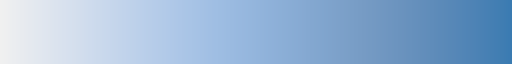

In [ ]:
cmap = cc.cm.blues
cmap

In [ ]:
df_sta['ratio_color'] =df_sta['capacite']/df_sta['capacite'].max()

In [ ]:
df_sta

,fid,id,id_local,code_com,xlong,ylat,capacite,capacite_cargo,mobilier,protection,...,nom_local,commune_local,adresse_local,type,CODE,epci,lon,lat,annee,ratio_color
0,1,1,1,38185.0,5.714076,45.181421,40,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Irvoy,Grenoble,18 Rue Irvoy,stationnementcyclable,0,LaMetro,5.71408,45.18142,2021,0.067114
1,2,3,3,38185.0,5.704258,45.202770,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Presqu'île,Grenoble,84 rue des Martyrs,stationnementcyclable,1,LaMetro,5.70426,45.20277,2021,0.062081
2,3,4,4,38185.0,5.712925,45.192064,42,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park gare Europole,Grenoble,2 Avenue Doyen Louis Weil,stationnementcyclable,2,LaMetro,5.71293,45.19206,2021,0.070470
3,4,5,5,38185.0,5.733307,45.194851,37,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Notre Dame Musée,Grenoble,50 Avenue Maréchal Randon,stationnementcyclable,3,LaMetro,5.73331,45.19485,2021,0.062081
4,5,6,6,38185.0,5.726688,45.186177,101,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Victor Hugo,Grenoble,Rue François Raoult,stationnementcyclable,4,LaMetro,5.72669,45.18618,2021,0.169463
5,6,7,7,38185.0,5.741103,45.188454,123,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Mistral Mairie,Grenoble,419 Avenue de Valmy,stationnementcyclable,5,LaMetro,5.74110,45.18845,2021,0.206376
6,7,8,8,38185.0,5.738740,45.162000,50,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Géants,Grenoble,10 Place des Géants,stationnementcyclable,6,LaMetro,5.73874,45.16200,2021,0.083893
7,8,9,9,38185.0,5.710744,45.188843,20,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Le Cèdre,Grenoble,Rue Anthoard,stationnementcyclable,7,LaMetro,5.71074,45.18884,2021,0.033557
8,9,10,10,38185.0,5.716797,45.189197,29,1,DIVERS : RACK VERTICAL ET ARCE,CONSIGNE COLLECTIVE FERMEE,...,Park Estacade,Grenoble,22 Rue Colonel Denfert Rochereau,stationnementcyclable,8,LaMetro,5.71680,45.18920,2021,0.048658
13,14,24,24,38185.0,5.734100,45.189395,5,0,RATELIER AVEC ARCEAU,CONSIGNE COLLECTIVE FERMEE,...,VILLARS-HEBERT,Grenoble,3b rue Dominique Villars,stationnementcyclable,13,LaMetro,5.73410,45.18939,2021,0.008389


In [ ]:
for index, row in df_sta.iterrows():
  color = cmap(row['ratio_color'])
  folium.CircleMarker([row['lat'],row['lon']],
                      radius=5,
                      popup=f"capacité :{row['capacite']}",
                      fill=True,
                      fill_color=color).add_to(map_parking)

In [ ]:
map_parking

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.columns

Index(['id', 'geo_point_2d', 'id_local', 'id_osm', 'code_com', 'xlong', 'ylat',
       'capacite', 'capacite_cargo', 'mobilier', 'protection', 'couverture',
       'acces', 'surveillance', 'lumiere', 'url_info', 'd_service', 'source',
       'proprietaire', 'gestionnaire', 'date_maj', 'commentaires', 'nom_local',
       'commune_local', 'adresse_local', 'type', 'code', 'epci', 'lon', 'lat'],
      dtype='object')

## Indicateur : Nombre de kilomètres de pistes cyclables au sein de l'agglomération Grenobloise.

In [184]:
df = pd.read_csv('pistes_cyclables.xls')
df

,ogc_fid,geo_point_2d,anne_maj,lametro,type,name,geo_shape
0,1489,"45.17402,5.74223",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.74223,4..."
1,1490,"45.17272,5.73701",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73701,4..."
2,1491,"45.17273,5.73488",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73488,4..."
3,1492,"45.17315,5.73476",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.73476,4..."
4,1625,"45.20183,5.75957",2016.0,1,chronovelo,NaN,"{""type"":""LineString"",""coordinates"":[[5.75957,4..."
...,...,...,...,...,...,...,...
1197,2813,"45.15938,5.72401",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72401,4..."
1198,2810,"45.20988,5.83977",2021.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.83977,4..."
1199,1637,"45.19119,5.72127",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72127,4..."
1200,1639,"45.18615,5.72467",2022.0,1,velodifficile,NaN,"{""type"":""LineString"",""coordinates"":[[5.72467,4..."


In [185]:
# Fonction pour vérifier le type de géométrie
def is_linestring(geo_shape):
    try:
        shape = json.loads(geo_shape)
        return shape['type'] == 'LineString'
    except:
        return False

# Vérifier si toutes les géométries sont des LineString
df['is_linestring'] = df['geo_shape'].apply(is_linestring)

# Résumé des résultats
print("Résumé des types de géométries :")
print(df['is_linestring'].value_counts())

# Identifier les géométries non conformes, s'il y en a
non_linestring_rows = df[~df['is_linestring']]
if not non_linestring_rows.empty:
    print("Lignes avec des géométries non conformes :")
    print(non_linestring_rows)
else:
    print("Toutes les géométries sont des LineString.")

Résumé des types de géométries :
is_linestring
True    1202
Name: count, dtype: int64
Toutes les géométries sont des LineString.


### Calcul des distances de la piste cyclable

In [205]:
def test(file):
  df=pd.read_csv(file)
  shape = json.loads(element for element in df['geo_shape'])
  if shape['type']=='LineString':
    coordinates = shape['coordinates']
    df['distance'] = [geodesic(coordinates[i],coordinates[i+1]).kilometers for i in range(len(coordinates)-1)]
    return df

  else:
    return 'Le fichier ne comprend pas de données au format gps de type LineString'

In [206]:
test('pistes_cyclables.xls')

TypeError: the JSON object must be str, bytes or bytearray, not generator

In [201]:
from shapely import length
from shapely.geometry import shape
def calculate_total_distance(file):
  try:
      df = pd.read_csv(file)
      df['geometry'] = df['geo_shape'].apply(shape)  # Convertir en objets Shapely

      # Filtrer uniquement les lignes avec des géométries de type LineString
      lines = df[df['geometry'].geom_type == 'LineString']

      if lines.empty:
          return 'Le fichier ne contient pas de lignes'

      # Calculer la distance totale
      total_distance = lines['geometry'].apply(length).sum()
      return total_distance
  except FileNotFoundError:
        return 'Fichier introuvable'
  except KeyError:
      return "La colonne 'geo_shape' est manquante"
  except Exception as e:
      return f"Une erreur s'est produite: {e}"

In [202]:
calculate_total_distance('pistes_cyclables.xls')

"Une erreur s'est produite: 'str' object has no attribute 'get'"

In [186]:
# Fonction pour calculer la distance d'une piste cyclable à partir de la colonne geo_shape
def calculate_distance(geo_shape):
    try:
        # Charger les coordonnées GeoJSON
        shape = json.loads(geo_shape)
        if shape['type'] == 'LineString':
            coordinates = shape['coordinates']
            # Calculer la distance totale entre les points consécutifs
            distances = [
                geodesic(coordinates[i], coordinates[i+1]).kilometers
                for i in range(len(coordinates) - 1)
            ]
            return sum(distances)
    except:
        return None  # Retourner None si un problème survient

# Ajouter une colonne pour les distances
df['distance_km'] = df['geo_shape'].apply(calculate_distance)

# Enregistrer le DataFrame avec la nouvelle colonne dans un nouveau fichier CSV
df.to_csv('fichier_avec_distances.csv', index=False)

# Afficher les premières lignes pour vérifier
print(df.head())

   ogc_fid      geo_point_2d  anne_maj  lametro        type name  \
0     1489  45.17402,5.74223    2016.0        1  chronovelo  NaN   
1     1490  45.17272,5.73701    2016.0        1  chronovelo  NaN   
2     1491  45.17273,5.73488    2016.0        1  chronovelo  NaN   
3     1492  45.17315,5.73476    2016.0        1  chronovelo  NaN   
4     1625  45.20183,5.75957    2016.0        1  chronovelo  NaN   

                                           geo_shape  is_linestring  \
0  {"type":"LineString","coordinates":[[5.74223,4...           True   
1  {"type":"LineString","coordinates":[[5.73701,4...           True   
2  {"type":"LineString","coordinates":[[5.73488,4...           True   
3  {"type":"LineString","coordinates":[[5.73476,4...           True   
4  {"type":"LineString","coordinates":[[5.75957,4...           True   

   distance_km  
0     0.231531  
1     0.235551  
2     0.055292  
3     0.106301  
4     0.234373  


In [188]:
df.distance_km.sum()

619.2463236890862

## Streamlit

voir fichier streamlit_script.py

In [ ]:
def fct_map_reseau_cyclable(file):
  df_piste = pd.read_csv(file)
  # Création des colonnes 'latitude' et 'longitude'
  df_piste['lat'] = [element[1] for element in df_piste['geo_point_2d'].str.split(',')]
  df_piste['long'] = [element[0] for element in df_piste['geo_point_2d'].str.split(',')]
  df_piste['lat'] = df_piste['lat'].astype(object)
  df_piste['long'] = df_piste['long'].astype(object)
  df_piste['geo_shape'] = df_piste['geo_shape'].apply(lambda x: LineString(eval(x)['coordinates']))
  df_piste['coordonnees'] = df_piste['geo_shape'].apply(lambda x: list(x.coords)).to_list()

  df_piste['coordonnees'] = df_piste['coordonnees'].apply(lambda x: reverse_coordonnees(x))

  # Création de la map
  map_piste_cyclable = folium.Map(location=[45.188529, 5.724524],zoom_start=14,titles='Map Piste Cyclable')
  for cords in df_piste['coordonnees']:
    folium.PolyLine(cords, color='red').add_to(map_piste_cyclable)

  return map_piste_cyclable

In [ ]:
st_folium(fct_map_reseau_cyclable('BaseDeDonnées/Grenoble/pistes_cyclables.xls'))